In [ ]:
# Exploratory data analysis of cities with a healthy lifestyle
# Correlation analysis of level of happiness and lifestyle factors
# Data source: Healthy Lifestyle Cities Report 2021 from https://www.lenstore.co.uk/research/healthy-lifestyle-report/

In [1]:
# Importing libraries & Dataset

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv(r'D:\User\Documents\DataSets\healthy_lifestyle_city_2021.csv')

In [2]:
# Dataframe information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    44 non-null     object 
 3   Cost of a bottle of water(City)         44 non-null     object 
 4   Obesity levels(Country)                 44 non-null     object 
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     object 
 7   Annual avg. hours worked                44 non-null     object 
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


In [3]:
# Checking the dataframe

df

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04


In [4]:
# Replacing '-' into null

df = df.replace('-', np.nan)

In [5]:
# Looking at the missing data

df.isnull().sum()

City                                       0
Rank                                       0
Sunshine hours(City)                       1
Cost of a bottle of water(City)            0
Obesity levels(Country)                    0
Life expectancy(years) (Country)           0
Pollution(Index score) (City)              1
Annual avg. hours worked                  11
Happiness levels(Country)                  0
Outdoor activities(City)                   0
Number of take out places(City)            0
Cost of a monthly gym membership(City)     0
dtype: int64

In [6]:
# Removing symbols from dataset

df['Cost of a bottle of water(City)'] = df['Cost of a bottle of water(City)'].str.replace('£', '')
df['Obesity levels(Country)'] = df['Obesity levels(Country)'].str.replace('%', '')
df['Cost of a monthly gym membership(City)'] = df['Cost of a monthly gym membership(City)'].str.replace('£', '')


In [7]:
# Converting objects into floats

df['Sunshine hours(City)'] = df['Sunshine hours(City)'].astype(float, errors = 'raise')
df['Cost of a bottle of water(City)'] = df['Cost of a bottle of water(City)'].astype(float, errors = 'raise')
df['Obesity levels(Country)'] = df['Obesity levels(Country)'].astype(float, errors = 'raise')
df['Pollution(Index score) (City)'] = df['Pollution(Index score) (City)'].astype(float, errors = 'raise')
df['Annual avg. hours worked'] = df['Annual avg. hours worked'].astype(float, errors = 'raise')
df['Cost of a monthly gym membership(City)'] = df['Cost of a monthly gym membership(City)'].astype(float, errors = 'raise')

In [28]:
#Showing the statistics of the data

cols = set(df.columns) - {'Rank'}
df1 = df[list(cols)]
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Obesity levels(Country),44.0,21.925000,10.195670,3.90,19.500,22.300,29.000,36.20
Outdoor activities(City),44.0,213.977273,127.190297,23.00,125.250,189.500,288.250,585.00
Pollution(Index score) (City),43.0,51.122326,21.856190,13.08,34.355,52.640,66.630,91.74
Annual avg. hours worked,33.0,1672.909091,179.626933,1380.00,1540.000,1686.000,1779.000,2137.00
Cost of a monthly gym membership(City),44.0,40.420000,15.006457,16.07,31.310,37.330,47.210,73.11
Happiness levels(Country),44.0,6.435000,0.991202,3.57,5.870,6.900,7.175,7.80
Sunshine hours(City),43.0,2245.860465,567.403719,1405.00,1798.500,2066.000,2629.000,3542.00
Number of take out places(City),44.0,1443.113636,1388.803270,250.00,548.000,998.000,1674.250,6417.00
Cost of a bottle of water(City),44.0,1.173409,0.718642,0.15,0.570,1.195,1.600,3.20
Life expectancy(years) (Country),44.0,78.175000,5.304370,56.30,75.400,80.400,81.800,83.20


In [ ]:
# Exploratory Data Analysis of the Dataset

In [61]:
columns=['Happiness levels(Country)', 'Life expectancy(years) (Country)', 
         'Pollution(Index score) (City)', 'Annual avg. hours worked', 
         'Sunshine hours(City)', 'Obesity levels(Country)', 
         'Outdoor activities(City)','Number of take out places(City)',
         'Cost of a monthly gym membership(City)', 'Cost of a bottle of water(City)']

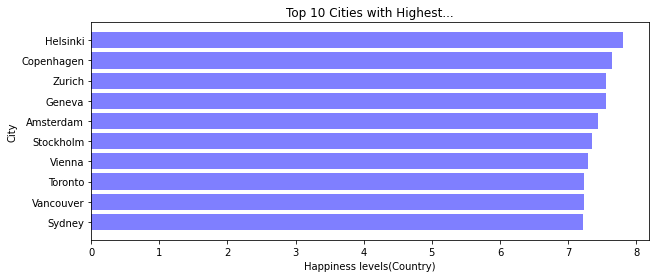

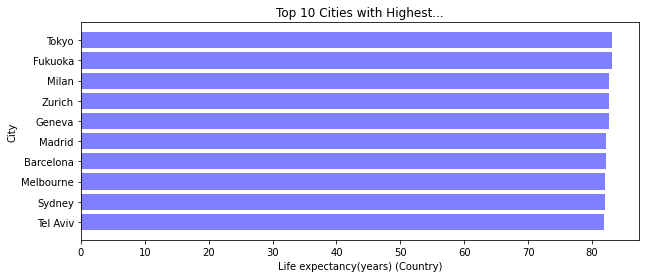

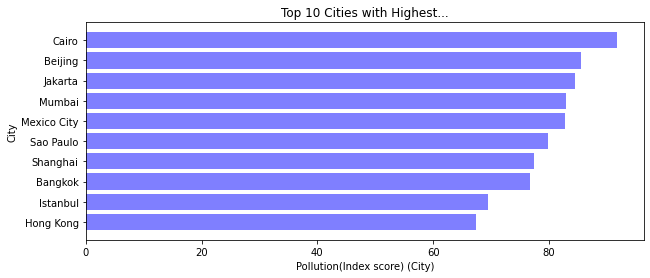

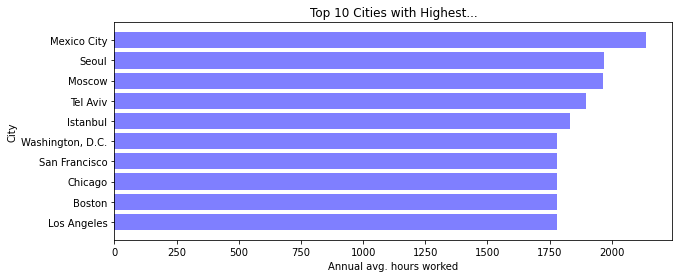

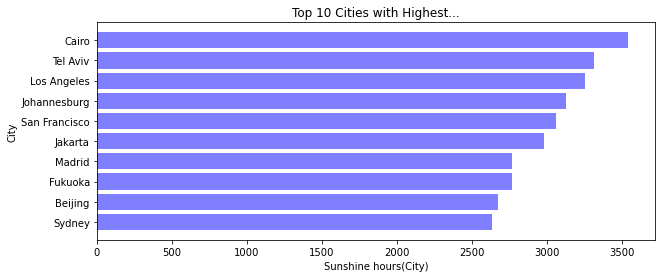

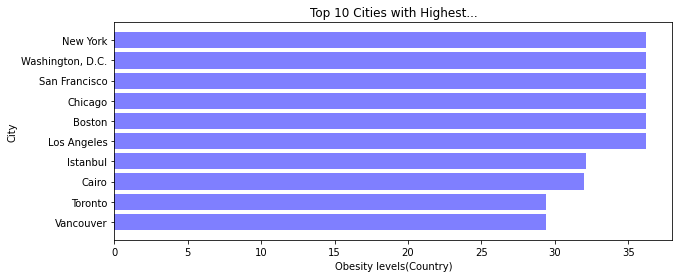

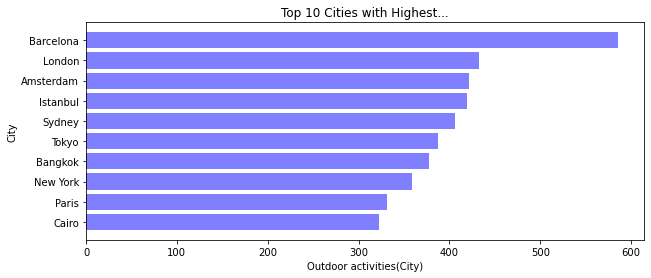

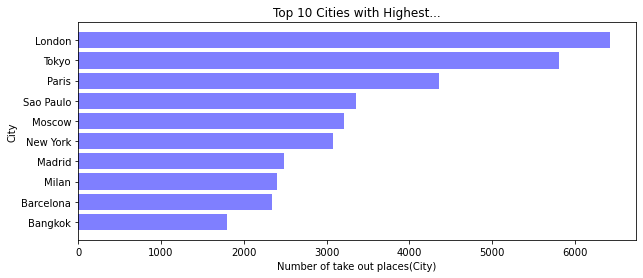

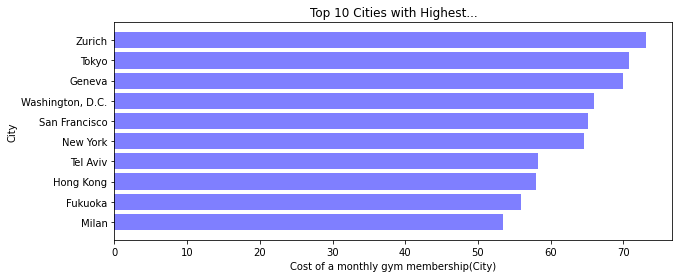

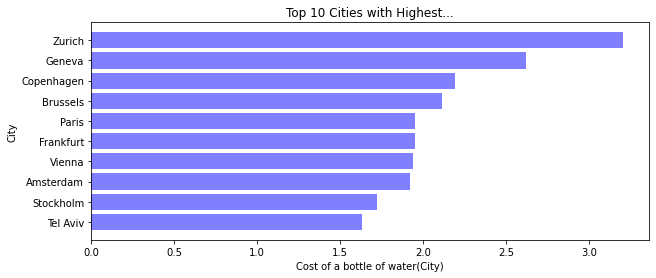

In [64]:
for column in columns:
    top_cities=df.nlargest(10,column).sort_values(by=column, ascending=True)
    plt.figure(figsize=(10,4))
    plt.barh(top_cities['City'], top_cities[column],color='blue',alpha=0.5)
    plt.ylabel('City', fontsize = 10)
    plt.xlabel(column, fontsize = 10)
    plt.title('Top 10 Cities with Highest...')

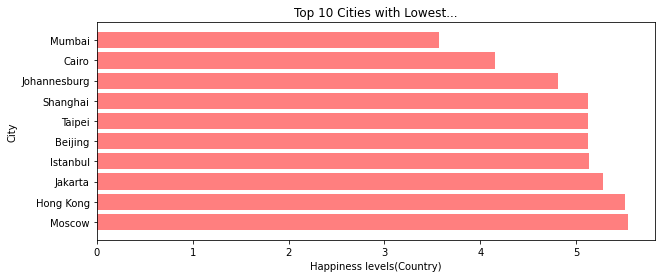

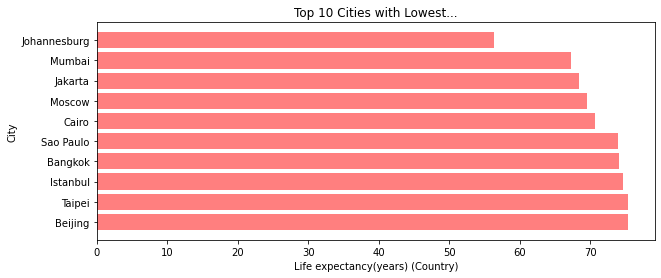

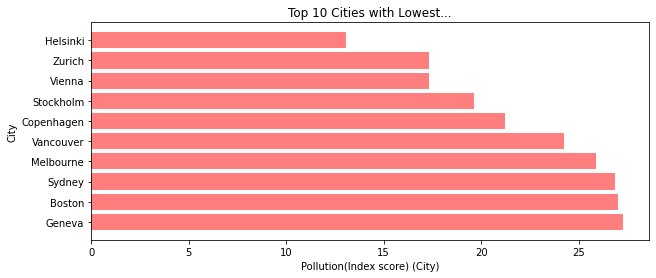

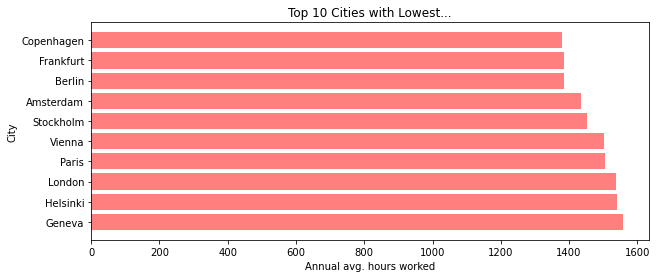

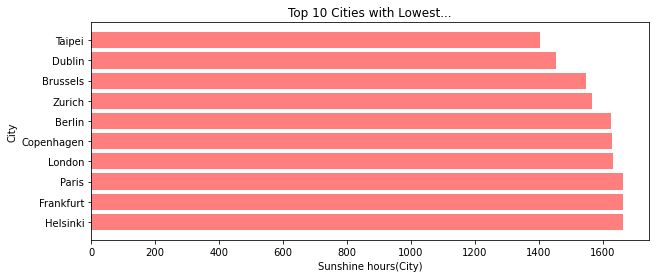

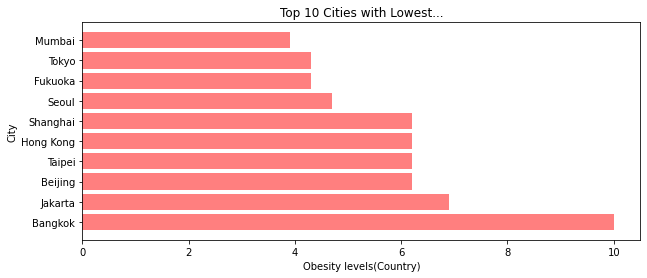

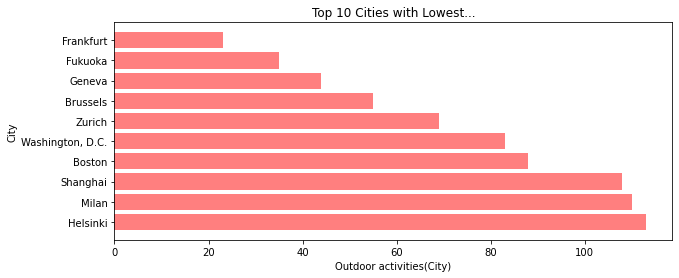

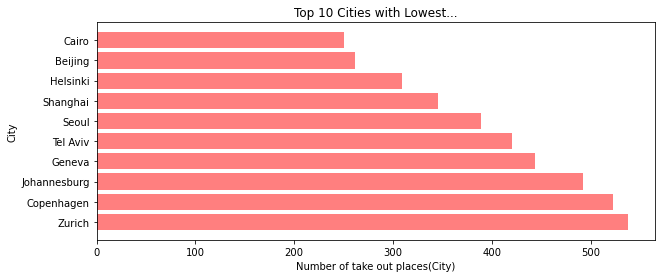

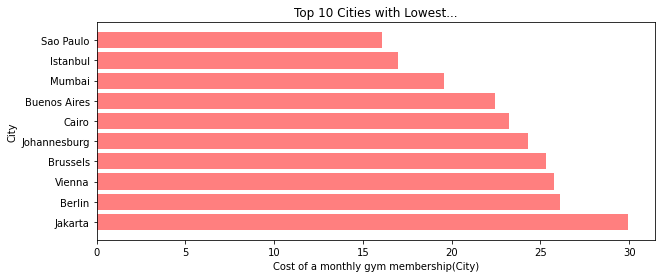

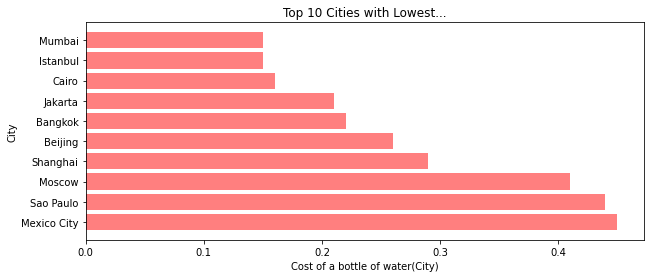

In [66]:
for column in columns:
    top_cities=df.nsmallest(10,column).sort_values(by=column, ascending=False)
    plt.figure(figsize=(10,4))
    plt.barh(top_cities['City'], top_cities[column],color='red',alpha=0.5)
    plt.ylabel('City', fontsize = 10)
    plt.xlabel(column, fontsize = 10)
    plt.title('Top 10 Cities with Lowest...')

In [ ]:
# Correlation Analysis of Level of Happiness with Health and Lifestyle Factors

In [116]:
# Looking at the correlation betweeen Lifestyle factors

cols = set(df.columns) - {'Rank', 'Cost of a monthly gym membership(City)', 'Number of take out places(City)', 
                          'Cost of a bottle of water(City)'}
lifestyle = df[list(cols)].sort_values('Happiness levels(Country)', ascending=True)
lifestyle.corr()

,Obesity levels(Country),Outdoor activities(City),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Sunshine hours(City),Life expectancy(years) (Country)
Obesity levels(Country),1.000000,0.150171,-0.256251,0.265088,0.446399,0.281304,0.091071
Outdoor activities(City),0.150171,1.000000,0.242622,0.083404,-0.137612,0.129550,-0.044864
Pollution(Index score) (City),-0.256251,0.242622,1.000000,0.544704,-0.765902,0.393847,-0.558713
Annual avg. hours worked,0.265088,0.083404,0.544704,1.000000,-0.531554,0.560260,-0.480859
Happiness levels(Country),0.446399,-0.137612,-0.765902,-0.531554,1.000000,-0.334141,0.724587
Sunshine hours(City),0.281304,0.129550,0.393847,0.560260,-0.334141,1.000000,-0.356351
Life expectancy(years) (Country),0.091071,-0.044864,-0.558713,-0.480859,0.724587,-0.356351,1.000000


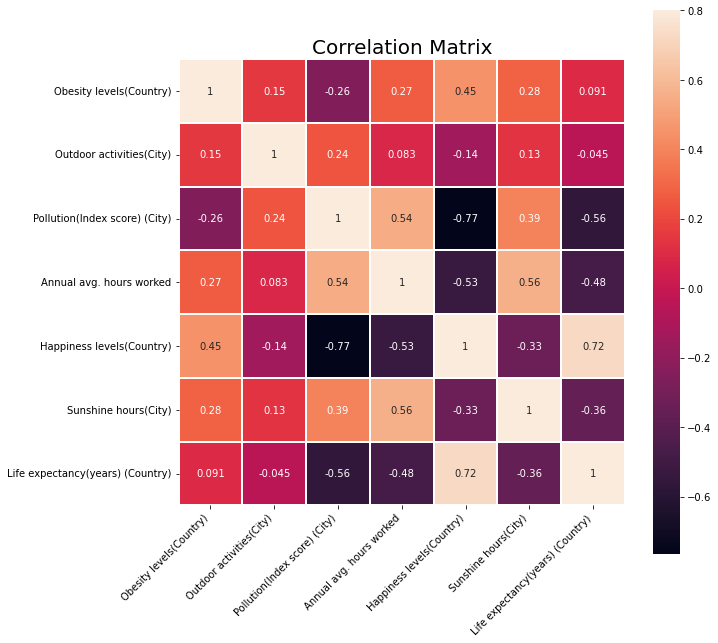

In [118]:
plt.figure(figsize=(10,10))
sns.heatmap(lifestyle.corr(),vmax=.8, linewidths=0.01,square=True,annot=True, linecolor="white")
plt.xticks(rotation=45, horizontalalignment='right') 
plt.title('Correlation Matrix', fontsize = 20)

plt.show()

In [ ]:
plt.figure(figsize=(10,10))
h_corr = correlation.nlargest(7,'Happiness levels(Country)')['Happiness levels(Country)'].index
sns.heatmap(h_corr.corr(),vmax=.8, linewidths=0.01,square=True,annot=True, linecolor="white")
plt.xticks(rotation=45, horizontalalignment='right') 
plt.title('Correlation Matrix', fontsize = 20)

plt.show()

In [ ]:
# There is a large inverse correlation between happiness & pollution and happiness & average hours worked
# There is a large correlation between happiness and life expectancy
# (If coefficient is between 0.5 to 1.0, the strength of association is considered large)

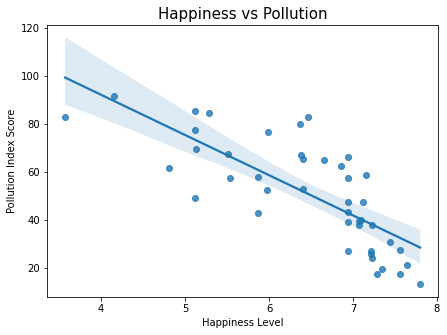

In [84]:
# Plotting Happiness Level vs Pollution

plt.figure(figsize=(7,5))

sns.regplot(x='Happiness levels(Country)', y='Pollution(Index score) (City)', data=df)
plt.ylabel('Pollution Index Score', fontsize = 10)
plt.xlabel('Happiness Level', fontsize = 10)
plt.title('Happiness vs Pollution', fontsize = 15)

plt.show()

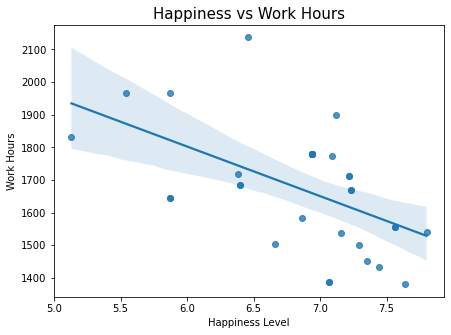

In [85]:
# Plotting Happiness Level vs Annual Average Work Hours

plt.figure(figsize=(7,5))

sns.regplot(x='Happiness levels(Country)', y='Annual avg. hours worked', data=df)
plt.ylabel('Work Hours', fontsize = 10)
plt.xlabel('Happiness Level', fontsize = 10)
plt.title('Happiness vs Work Hours', fontsize = 15)

plt.show()

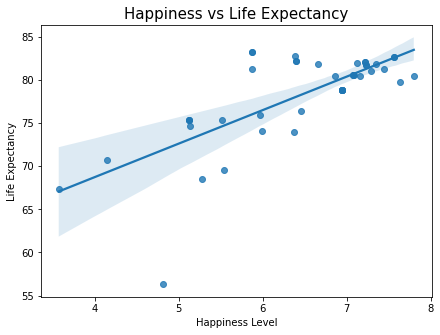

In [86]:
# Plotting Happiness Level vs Life Expectancy

plt.figure(figsize=(7,5))

sns.regplot(x='Happiness levels(Country)', y='Life expectancy(years) (Country)', data=df)
plt.ylabel('Life Expectancy', fontsize = 10)
plt.xlabel('Happiness Level', fontsize = 10)
plt.title('Happiness vs Life Expectancy', fontsize = 15)

plt.show()